In [1]:
from math import sqrt, exp
import numpy as np

In [2]:
def rnorm(mu=0, sigma=1):
    return np.random.normal(0, 1)


def wiener_process(T):
    wiener = np.zeros(T)
    for t in range(T):
        Wt = sqrt(t + 1) * rnorm(0, 1)
        wiener[t] = Wt
        
    return wiener


def GBM(S0, mu, sigma, T):
    gbm = np.zeros(T + 1)
    gbm[0] = S0
    wiener = wiener_process(T)
    for t in range(1, T + 1):
        drift = mu - (sigma ** 2) / 2
        drift = drift * t
        vol = sigma * wiener[t - 1]
        St = S0 * exp(drift + vol)
        gbm[t] = St
    
    return gbm

In [3]:
def generate_sample(S0, mu, sigma, T, sample_size):
    sample = np.zeros(shape=(sample_size, T + 1))
    for i in range(sample_size): 
        gbm = GBM(S0, mu, sigma, T)
        sample[i] = gbm
        
    return sample


def gbm_mean(S0, mu, t):
    return S0 * exp(mu * t)


def gbm_std(S0, mu, sigma, t):
    std = S0 ** 2
    std *= exp(2 * mu * t)
    std *= (exp(sigma ** 2 * t) - 1)
    
    return sqrt(std)

### Geometric Brownian Motion (GBM) moments
$\mathrm{E}[S_t] = S_0 \cdot e^{\mu t}, \, t=1,\ldots, T$

$\mathrm{Var}[S_t] = S_0^2 \cdot e^{2\mu t} \cdot (e^{\sigma^2 t} - 1), \, t=1,\ldots, T$

### Test case 1
For $\mu = 0$ we expect $\mathrm{E}[S_t] = S_0, \, t=1,\ldots, T$

In [4]:
sample_size = 100000
T = 10
S0 = 40
mu = 0
sigma = 0.25

sample = generate_sample(S0, mu, sigma, T, sample_size)
sample.mean(axis=0)

array([40.        , 39.9663292 , 40.06352884, 39.96491413, 40.06182376,
       39.93068189, 39.94724183, 39.89242018, 40.07227284, 40.10803742,
       40.10907371])

### Test case 2

For $\mu > 0$ we expect $\mathbb{E}[S_t] = S_0 \cdot e^{\mu t}, \, t=1,\ldots, T$

In [5]:
sample_size = 100000
S = 10
T = 10
S0 = 40
mu = 0.1
sigma = 0.25

sample = generate_sample(S0, mu, sigma, T, sample_size)
sample.mean(axis=0)

array([ 40.        ,  44.22619273,  48.89849787,  53.97040381,
        59.76656305,  65.7654426 ,  72.94297779,  80.56017522,
        89.37411478,  98.2666812 , 108.3178117 ])

In [6]:
for t in range(0, T + 1):
    print(gbm_mean(S0, mu, t))

40.0
44.20683672302591
48.85611032640679
53.99435230304013
59.672987905650814
65.94885082800513
72.88475201562036
80.55010829881907
89.02163713969871
98.384124446278
108.7312731383618


### Shortest path / dynamic programming solution

TODO:
2. Nauciti dodati tezine
3. Implementirati Dijkstru
4. Naci primjer za dynamic programming

In [40]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [56]:
a = int(np.random.randint(low=1, high=2 + 1, size=1))

In [58]:
np.random.normal(loc=10, scale=2)

6.454008742504776

In [61]:
ss = list(itertools.product(range(T + 1), range(S + 1)))
nodes = [f'S_{stage}_{state}' for stage, state in ss]
edges = []
for stage, state in ss:
    if stage == T:
        continue
    for i in range(5):
        next_state = state + i
        if S < next_state:
            continue
        weight = np.random.normal(loc=10, scale=2)
        edge = (f'S_{stage}_{state}', f'S_{stage + 1}_{next_state}', {'weight':weight})
        edges.append(edge)
        
G = nx.DiGraph(edges)
"""
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
"""

'\nG = nx.DiGraph()\nG.add_nodes_from(nodes)\nG.add_edges_from(edges)\n'

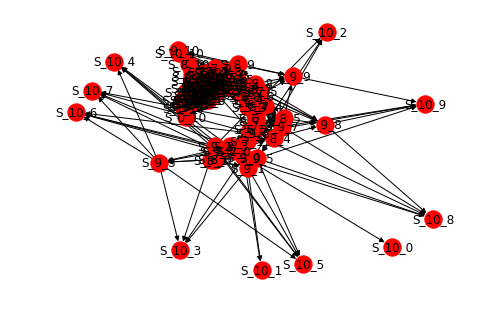

In [62]:
nx.draw(G, with_labels=True)

In [69]:
nx.shortest_path(G, 'S_0_0', 'S_10_10', weight='weight')

['S_0_0',
 'S_1_1',
 'S_2_3',
 'S_3_4',
 'S_4_5',
 'S_5_7',
 'S_6_7',
 'S_7_7',
 'S_8_7',
 'S_9_7',
 'S_10_10']

In [180]:
dijkstra(G, 'S_0_0', 'S_10_10')

(['S_0_0',
  'S_1_1',
  'S_2_3',
  'S_3_4',
  'S_4_5',
  'S_5_7',
  'S_6_7',
  'S_7_7',
  'S_8_7',
  'S_9_7',
  'S_10_10'],
 75.20978911877124)

In [179]:
class ShortestPathResult():
    def __init__(self):
        self.dist = {}
        self.path = {}

def reconstruct_shortest_path(source, target, prev):
    if source != target:
        path = reconstruct_shortest_path(source, prev[target], prev)
        path.append(target)
        return path
    else:
        path = [source]
        return path

def dijkstra(G, source, target, weight='weight'):
    prev = {node: None for node in G.nodes}
    dist = {node: np.Inf for node in G.nodes}
    dist[source] = 0
    unvisited = set(G.nodes)
    visited = set()
    current = source
    while (len(unvisited) > 0) & (current != target):
        for nbr, attrs in G[current].items():
            if not nbr in unvisited:
                continue
            d = attrs[weight] 
            new_dist = dist[current] + d
            if new_dist < dist[nbr]:
                dist[nbr] = new_dist
                prev[nbr] = current
   
        unvisited.remove(current)
        visited.add(current)
        d = {k: v for k, v in dist.items() if not k in visited}
        current = min(d, key=d.get)
        
    shortest_path = reconstruct_shortest_path(source, target, prev)
    
    return shortest_path, dist[target]

In [184]:
list(nx.topological_sort(G))

['S_0_10',
 'S_0_9',
 'S_0_8',
 'S_0_7',
 'S_0_6',
 'S_1_10',
 'S_0_5',
 'S_1_9',
 'S_0_4',
 'S_1_8',
 'S_0_3',
 'S_1_7',
 'S_0_2',
 'S_1_6',
 'S_2_10',
 'S_0_1',
 'S_1_5',
 'S_2_9',
 'S_0_0',
 'S_1_4',
 'S_2_8',
 'S_1_3',
 'S_2_7',
 'S_1_2',
 'S_2_6',
 'S_3_10',
 'S_1_1',
 'S_2_5',
 'S_3_9',
 'S_1_0',
 'S_2_4',
 'S_3_8',
 'S_2_3',
 'S_3_7',
 'S_2_2',
 'S_3_6',
 'S_4_10',
 'S_2_1',
 'S_3_5',
 'S_4_9',
 'S_2_0',
 'S_3_4',
 'S_4_8',
 'S_3_3',
 'S_4_7',
 'S_3_2',
 'S_4_6',
 'S_5_10',
 'S_3_1',
 'S_4_5',
 'S_5_9',
 'S_3_0',
 'S_4_4',
 'S_5_8',
 'S_4_3',
 'S_5_7',
 'S_4_2',
 'S_5_6',
 'S_6_10',
 'S_4_1',
 'S_5_5',
 'S_6_9',
 'S_4_0',
 'S_5_4',
 'S_6_8',
 'S_5_3',
 'S_6_7',
 'S_5_2',
 'S_6_6',
 'S_7_10',
 'S_5_1',
 'S_6_5',
 'S_7_9',
 'S_5_0',
 'S_6_4',
 'S_7_8',
 'S_6_3',
 'S_7_7',
 'S_6_2',
 'S_7_6',
 'S_8_10',
 'S_6_1',
 'S_7_5',
 'S_8_9',
 'S_6_0',
 'S_7_4',
 'S_8_8',
 'S_7_3',
 'S_8_7',
 'S_7_2',
 'S_8_6',
 'S_9_10',
 'S_7_1',
 'S_8_5',
 'S_9_9',
 'S_7_0',
 'S_8_4',
 'S_9_8',
 'S_8_3',


In [ ]:
def dp_shortest_path(G, source, target, weight='weight')

### Gurobi optimization

In [7]:
import gurobipy as gp
from gurobipy import GRB
import math

In [82]:
m = gp.Model('so')
at = [m.addVar(vtype=GRB.INTEGER, name=f'a_{t}') for t in range(T)]
st = [m.addVar(vtype=GRB.INTEGER, name=f's_{t}') for t in range(T + 1)]

m.update()

In [83]:
electric = [150 * 115 * (st[i] + at[i]) for i in range(T)]
diesel = [(3600 + 155 * 40) * (10 - st[i] - at[i]) for i in range(T)]
invest = [4*10**5 * math.exp(-0.05*t) * at[i] for i in range(T)]
final = [(10 - st[T]) * (4 * 10 ** 5) * math.exp(-0.05 * T)]

In [84]:
obj = []
obj.extend(electric)
obj.extend(diesel)
obj.extend(invest)
obj.extend(final)

m.setObjective(sum(obj))

In [26]:
try:

    # Create a new model
    m = gp.Model("mip1")

    # Create variables
    x = m.addVar(vtype=GRB.BINARY, name="x")
    y = m.addVar(vtype=GRB.BINARY, name="y")
    z = m.addVar(vtype=GRB.BINARY, name="z")

    # Set objective
    m.setObjective(x + y + 2 * z, GRB.MAXIMIZE)

    # Add constraint: x + 2 y + 3 z <= 4
    m.addConstr(x + 2 * y + 3 * z <= 4, "c0")

    # Add constraint: x + y >= 1
    m.addConstr(x + y >= 1, "c1")

    # Optimize model
    m.optimize()

    for v in m.getVars():
        print('%s %g' % (v.varName, v.x))

    print('Obj: %g' % m.objVal)

except gp.GurobiError as e:
    print('Error code ' + str(e.errno) + ': ' + str(e))

except AttributeError:
    print('Encountered an attribute error')

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0xf43f5bdf
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 16 available processors)

Solution count 2: 3 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
x 1
y 0
z 1
Obj: 3
